# Impoting modules

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from random import randrange
import cv2
import scipy
faces = datasets.fetch_olivetti_faces()
LA = np.linalg

In [3]:
print(faces.data)
print(faces.data.shape)
print(type(faces.data))

[[0.30991736 0.3677686  0.41735536 ... 0.15289256 0.16115703 0.1570248 ]
 [0.45454547 0.47107437 0.5123967  ... 0.15289256 0.15289256 0.15289256]
 [0.3181818  0.40082645 0.49173555 ... 0.14049587 0.14876033 0.15289256]
 ...
 [0.5        0.53305787 0.607438   ... 0.17768595 0.14876033 0.19008264]
 [0.21487603 0.21900827 0.21900827 ... 0.57438016 0.59090906 0.60330576]
 [0.5165289  0.46280992 0.28099173 ... 0.35950413 0.3553719  0.38429752]]
(400, 4096)
<class 'numpy.ndarray'>


## Plotting a sample

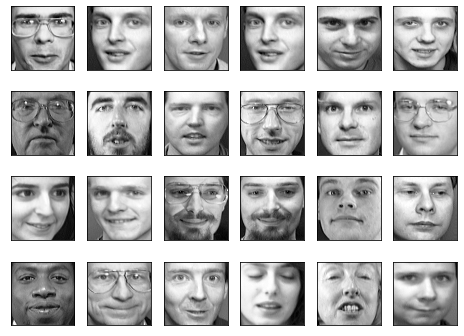

In [4]:
fig = plt.figure(figsize=(8, 6))
for i in range(24):
    ax = fig.add_subplot(4, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[randrange(0, 400)], cmap="gray")

In [5]:
# The shape of every image matrix
print("The shape of every image matrix is:", faces.images.shape)

The shape of every image matrix is: (400, 64, 64)


# Calculating the mean face

NameError: name 'mean' is not defined

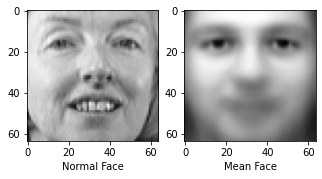

In [6]:
sum = np.copy(faces.images[0])
for i in range(1, len(faces.images)):
    sum += np.copy(faces.images[i])

avgface = sum / len(faces.images)
fig = plt.figure(figsize=(8, 6))
# Normal Face
nimg = fig.add_subplot(1, 3, 2)
nimg.imshow(faces.images[310], cmap="gray")
nimg.set_xlabel('Normal Face')
# Mean Face
mimg = fig.add_subplot(1, 3, 3)
mimg.imshow(avgface, cmap="gray")
mimg.set_xlabel('Mean Face')
print(mean)


# Calculating the mean-subtracted faces

Text(0.5, 0, 'Substracted Mean Face')

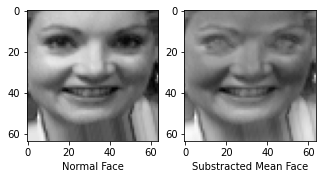

In [7]:
msub = np.copy(faces.images)
for i, img in enumerate(msub):
    msub[i] = img - avgface

findex = randrange(0, 400)
fig = plt.figure(figsize=(8, 6))
# Normal Face
nimg = fig.add_subplot(1, 3, 2)
nimg.imshow(faces.images[findex], cmap="gray")
nimg.set_xlabel('Normal Face')
# Mean Face
mimg = fig.add_subplot(1, 3, 3)
mimg.imshow(msub[findex], cmap="gray")
mimg.set_xlabel('Substracted Mean Face')

# Falttening data

(400, 4096)

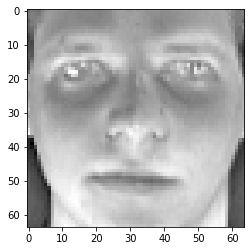

In [8]:
fmsub = []
for i, img in enumerate(msub):
    fmsub.append(img.flatten())
fmsub = np.array(fmsub)
plt.imshow(fmsub[0].reshape(64, 64), cmap="gray")
fmsub.shape



# Coveriance Matrix

[[ 0.03256896  0.0322172   0.02860267 ... -0.00627397 -0.00599633
  -0.00466273]
 [ 0.0322172   0.03582189  0.03403027 ... -0.00892454 -0.00845001
  -0.0067429 ]
 [ 0.02860267  0.03403027  0.03782975 ... -0.0121586  -0.0113095
  -0.00946599]
 ...
 [-0.00627397 -0.00892454 -0.0121586  ...  0.03519638  0.03136034
   0.02796677]
 [-0.00599633 -0.00845001 -0.0113095  ...  0.03136034  0.0336307
   0.03122917]
 [-0.00466273 -0.0067429  -0.00946599 ...  0.02796677  0.03122917
   0.03254726]]


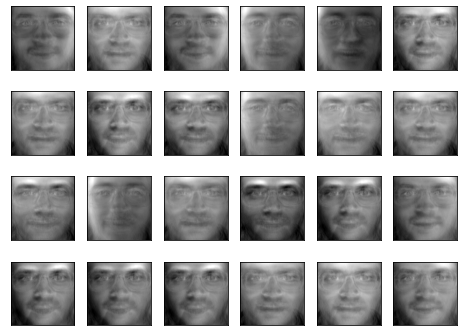

In [9]:
cov = (np.matmul(fmsub.T,fmsub))*(1/len(fmsub))
print(cov)
fig = plt.figure(figsize=(8, 6))
for i in range(24):
    ax = fig.add_subplot(4, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(cov[randrange(0, 400)].reshape(64, 64), cmap="gray")

# Forming the eigenfaces

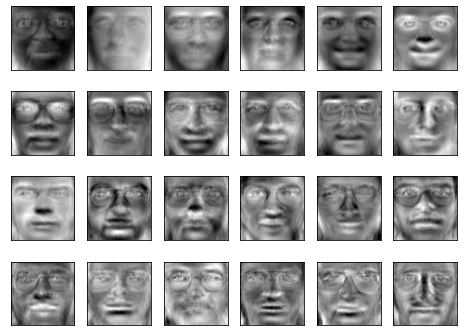

In [10]:
p1, p2, eiv = LA.svd(fmsub, full_matrices=0)
# print(u)
fig = plt.figure(figsize=(8, 6))
for i in range(24):
    ax = fig.add_subplot(4, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(eiv[i].reshape(64, 64), cmap='gray')

# Calculating Original faces correlation with eigen faces

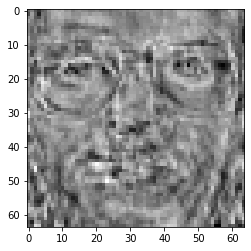

In [11]:
# Summing all the eigen faces
sum = np.copy(eiv[0])
for i in range(1, len(eiv)):
    sum += np.copy(eiv[i])

sum = (sum + avgface.reshape(64*64,)) / len(eiv)
plt.imshow(sum.reshape(64,64), cmap="gray")

In [12]:
corfaces = []
for i in faces.images:
    corface = []
    for n in eiv[:10]:
        corrcoef = np.dot(i, n.reshape(64,64))
        corface.append(corrcoef)
    corfaces.append({"face": i, "cor": np.array(corface)})
corfaces = np.array(corfaces)
# print(corfaces[0])
# print(faces.images[0], faces.images[0].shape)
# print(eiv[0].reshape(64,64), eiv[0].reshape(64,64).shape)
print(np.dot(eiv[0], fmsub[0]))
# print(np.corrcoef(faces.images[0], eiv[0].reshape(64,64)).shape)

-6.4326124


Text(0.5, 0, 'Reconstructed Face')

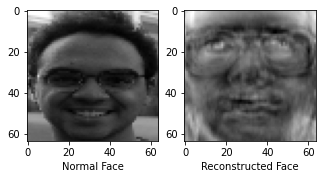

In [13]:
import cv2
im = np.array(cv2.imread("om.png"))
mim = []
for i in im:
#     print([np.flatten(l) for l in i])
    mim.append(np.array(i).flatten())
mim = cv2.resize(np.array(mim), (64, 64)) / 255
# print(mim, mim.shape)
cd = mim - avgface
rc = avgface.flatten()
for i in eiv[0:100]:
#     print(np.dot(i, cd.flatten()))
    rc += np.dot(i, cd.flatten())*i
    
# plt.imshow(rc.reshape(64, 64), cmap="gray")
fig = plt.figure(figsize=(8, 6))
# Normal Face
nimg = fig.add_subplot(1, 3, 2)
nimg.imshow(cd + avgface, cmap="gray")
nimg.set_xlabel('Normal Face')
# Mean Face
mimg = fig.add_subplot(1, 3, 3)
mimg.imshow(rc.reshape(64, 64), cmap="gray")
mimg.set_xlabel('Reconstructed Face')

# Loading Data

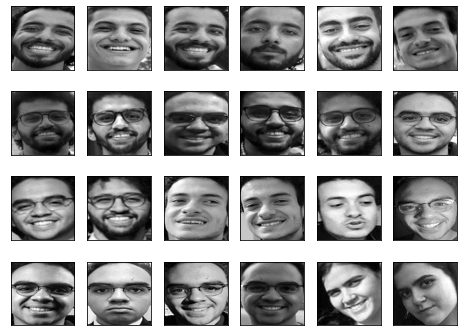

In [14]:
pckg = scipy.io.loadmat('faces.mat')
data = pckg["imgs"]
faces = []
for i in data[0]:
    faces.append(np.array(i))
faces = np.array(faces) / 255
fig = plt.figure(figsize=(8, 6))
for i in range(24):
#     print(faces[i])
    ax = fig.add_subplot(4, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(faces[35- i], cmap="gray")

# Average Face

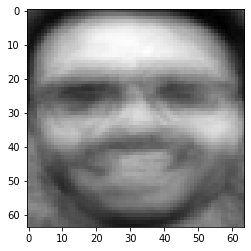

In [15]:
sum = np.copy(faces[0])
for i in faces[0:]:
    sum += np.copy(i)
avgFace = sum / len(faces)
plt.imshow(avgFace, cmap="gray")
# print(avgFace)

# Mean Substracted Faces

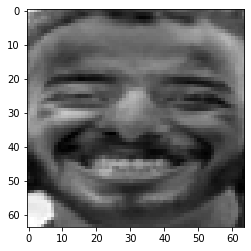

In [16]:
mSub = np.copy(faces) - avgFace
plt.imshow(mSub[37], cmap="gray")

# Falttening Data

In [17]:
fMSub = []
for i in mSub:
    fMSub.append(np.array(i.flatten()))
fMSub = np.array(fMSub)
print(fMSub.shape)

(49, 4096)


# Coveriance Matrix

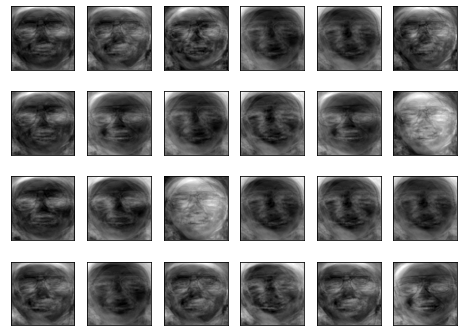

In [18]:
cov = (np.matmul(fMSub.T,fMSub))*(1/len(fMSub))
# print(cov)
fig = plt.figure(figsize=(8, 6))
for i in range(24):
    ax = fig.add_subplot(4, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(cov[randrange(0, 400)].reshape(64, 64), cmap="gray")

# Creating eigenfaces

(49, 4096)


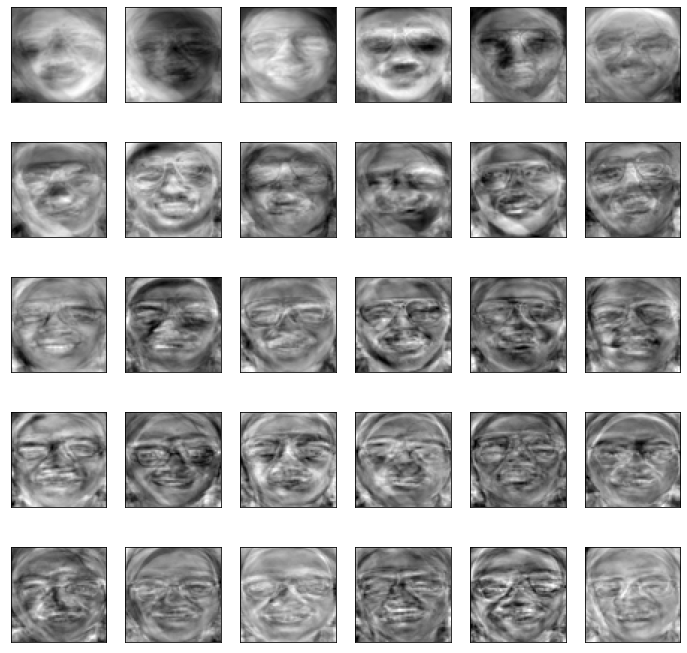

In [19]:
x, y, eigVec = LA.svd(fMSub, full_matrices=0)
print(eigVec.shape)
fig = plt.figure(figsize=(12, 12))
for i in range(30):
    ax = fig.add_subplot(5, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(eigVec[i].reshape(64, 64), cmap='gray')

# Reconstructing Faces

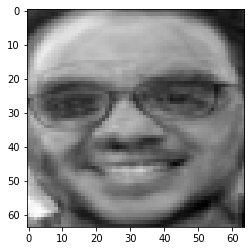

In [25]:
dimg = np.array(cv2.imread("31.png", 0))
img = []
for i in dimg:
    img.append(np.array(i).flatten())
img = cv2.resize(np.array(img), (64, 64)) / 255
cd = mSub[1]
# cd = img - avgFace
rc = avgFace.flatten()
for i in eigVec[0:-35]:
#     print(np.dot(i, cd.flatten()))
    rc += np.dot(i, cd.flatten())*i
    
plt.imshow(rc.reshape(64, 64), cmap="gray")

# Classification

In [21]:
# Test
weights = []
for i in eigVec:
    weights.append(np.dot(i, faces[0].flatten()))
weights = np.array(weights)
print(weights, weights.shape)
weights2 = []
for i in eigVec:
    weights2.append(np.dot(i, faces[1].flatten()))
weights2 = np.array(weights2)
# print(weights2, weights2.shape)
# print(np.corrcoef(weights, weights2))

[19.98586873  7.74714603 -0.52416691 -3.02387309  3.69273079  5.03553313
 -0.80220574  1.36594273 -0.97572472 -1.04226693 -1.53056168  2.92937074
  2.10644521 -0.8486275  -0.18063072  1.79642754  0.83126492  0.48782334
  1.96569682 -0.37200016 -0.50946745 -0.97173953 -1.45015881 -0.0334856
 -0.74332806  0.08084073  0.97463263 -0.85378406  0.44894922 -0.42060025
 -0.20953072 -1.08662875 -0.56578862  0.2564867  -0.15374538  0.67465487
  1.50103507  1.25069681 -0.46737206 -2.39396189  1.31155159 -0.0363245
  0.74526714 -0.74191294  0.27842584 -0.40443774  0.18843181  0.27647944
 -4.97230299] (49,)


# Weighting Data

In [22]:
wightedFaces = []
for face in faces:
    weights = []
    for eig in eigVec:
        weights.append(np.dot(eig, face.flatten()))
    wightedFaces.append({"face": face, "weights": np.array(weights)})

# Matching Faces

0.9645916682915731


Text(0.5, 0, 'Match')

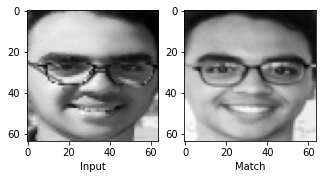

In [23]:
# Import Img
dimg = np.array(cv2.imread("new.png", 0))
img = []
for i in dimg:
    img.append(np.array(i).flatten())
img = cv2.resize(np.array(img), (64, 64)) / 255
face = img
# Weights
weights = []
for i in eigVec:
    weights.append(np.dot(i, face.flatten()))
weights = np.array(weights)
# print(weights)
# print(wightedFaces[0]["weights"])
matches = []
for wface in wightedFaces:
    corr = np.corrcoef(weights, wface["weights"])[0, 1]
#     print(corr)
    matches.append({"face": wface["face"], "corr": corr})
sortedMatches = sorted(matches,key=lambda d: d['corr'], reverse=True)
print(sortedMatches[0]["corr"])
# plt.imshow(sortedMatches[0]["face"], cmap="gray")
fig = plt.figure(figsize=(8, 6))
# Input Face
nimg = fig.add_subplot(1, 3, 2)
nimg.imshow(face, cmap="gray")
nimg.set_xlabel('Input')
# Mean Face
mimg = fig.add_subplot(1, 3, 3)
mimg.imshow(sortedMatches[0]["face"], cmap="gray")
mimg.set_xlabel('Match')